In [2]:
import numpy as np
import matplotlib.pyplot as plt
import wfdb
import os
import scipy.io as sio

In [3]:
if os.path.isdir("mitdb"):
    print('You already have the data.')
else:
    wfdb.dl_database('mitdb', 'mitdb')

You already have the data.


In [4]:
record = wfdb.rdsamp('mitdb/100', sampto=3000)
# annotation = wfdb.rdann('mitdb/100', 'atr', sampto=3000)

In [19]:
record[1]

{'fs': 360,
 'sig_len': 3000,
 'n_sig': 2,
 'base_date': None,
 'base_time': None,
 'units': ['mV', 'mV'],
 'sig_name': ['MLII', 'V5'],
 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}

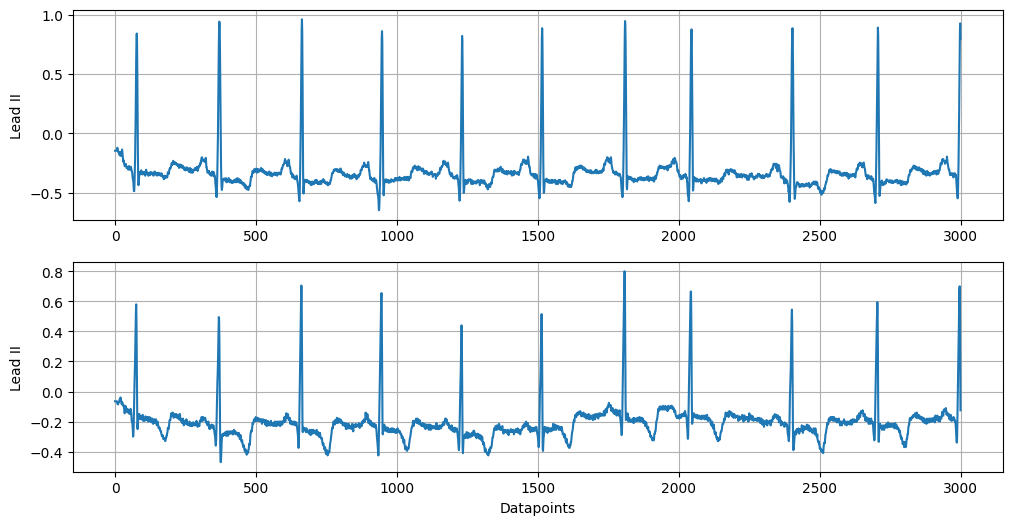

In [5]:
fig, ax = plt.subplots(nrows=2, figsize=(12,6))
I = record[0][:, 0]
II = record[0][:, 1]

ax[0].plot(I)
ax[0].set_ylabel('Lead II')
ax[0].grid()
ax[1].plot(II)
ax[1].set_xlabel('Datapoints')
ax[1].set_ylabel('Lead II')
ax[1].grid()
plt.show()

In [18]:
sig_prop = {k:v for k,v in record[1].items() if v is not None}
print(sig_prop)

{'fs': 360, 'sig_len': 3000, 'n_sig': 2, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}


In [ ]:
matfile =  {"heart": I, "ref": II}
matfile.update(sig_prop)
print(matfile)


{'heart': array([-0.145, -0.145, -0.145, ...,  0.875,  0.925,  0.795]), 'ref': array([-0.065, -0.065, -0.065, ...,  0.555,  0.21 , -0.125]), 'fs': 360, 'sig_len': 3000, 'n_sig': 2, 'base_date': None, 'base_time': None, 'units': ['mV', 'mV'], 'sig_name': ['MLII', 'V5'], 'comments': ['69 M 1085 1629 x1', 'Aldomet, Inderal']}


In [13]:
sio.savemat("matfiles/100.mat",matfile);

TypeError: Could not convert None (type <class 'NoneType'>) to array